In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

from graph import attach_graph_attributes, get_graph_measurements,\
    compare_graph_measurements, print_comparison_results
from real_graphs import load_dataset_to_graph, attach_real_attributes
from recreate_graph import get_trained_model, graph_to_training_dataframe, preprocess_dataframe, recreate_by_priority_rank
from training_dataframes import prepare_dataframes

Using TensorFlow backend.
/home/smoq/.virtualenvs/cna/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
dataset_name = 'primary_school' #'petster-hamster'

delimiter = '\t'
dataset_path = os.path.join('prepared_datasets', dataset_name)
df_dirpath = os.path.join('prepared_training_dfs', dataset_name)

In [3]:
# load graph
graph = load_dataset_to_graph(dataset_path)
# remove nodes if more than max_nodes
max_nodes = 250
overlimit_nodes = graph.number_of_nodes() - max_nodes
if overlimit_nodes > 0:
    print('Cutting nodes up to {}'.format(max_nodes))
    random.seed(93)
    nodes_to_remove = random.sample(graph.nodes(), overlimit_nodes)
    graph.remove_nodes_from(nodes_to_remove)
# create dataframes (graph_attrs, real_attrs, graph + real attrs)
if not os.path.exists(df_dirpath):
    print('Creating dataframes')
    os.mkdir(df_dirpath)
    prepare_dataframes(df_dirpath, graph, dataset_path, delimiter)    
    print('Done')

In [4]:
df_path = 'graph_real_attrs.csv'
path = os.path.join(df_dirpath, df_path)

df = pd.read_csv(path, delimiter=delimiter)
X_test = df.drop(['num_of_edges'], axis=1)
y_test = df['num_of_edges']

model = get_trained_model(df, epochs=8, batch_size=64)

y_pred = model.predict(X_test)

Epoch 1/8
58564/58564 [==============================] - 1s 13us/step - loss: 0.0327 - acc: 0.7064
Epoch 2/8
58564/58564 [==============================] - 1s 13us/step - loss: 0.0024 - acc: 0.7160
Epoch 3/8
58564/58564 [==============================] - 1s 12us/step - loss: 0.0015 - acc: 0.7160
Epoch 4/8
58564/58564 [==============================] - 1s 13us/step - loss: 0.0012 - acc: 0.7160
Epoch 5/8
58564/58564 [==============================] - 1s 13us/step - loss: 0.0011 - acc: 0.7160
Epoch 6/8
58564/58564 [==============================] - 1s 12us/step - loss: 9.9230e-04 - acc: 0.7160
Epoch 7/8
58564/58564 [==============================] - 1s 13us/step - loss: 9.4363e-04 - acc: 0.7160
Epoch 8/8
58564/58564 [==============================] - 1s 15us/step
loss: 0.0008968102157459998, accuracy: 0.7159688545864353


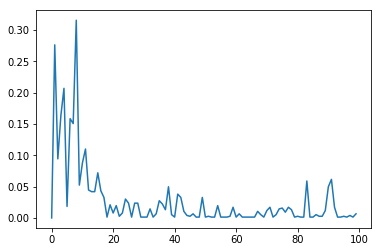

In [5]:
plt.plot(y_test[:100])
plt.show()
# TODO - NICE PLOT y_test vs y_pred

In [6]:
for df_path in ['graph_attrs.csv', 'real_attrs.csv', 'graph_real_attrs.csv']:
    path = os.path.join(df_dirpath, df_path)
    df = pd.read_csv(path, delimiter=delimiter)

    model = get_trained_model(df, epochs=16, batch_size=64, verbose=0)
    recreated_graph = recreate_by_priority_rank(graph, df, model)
    
    graph_measurements = get_graph_measurements(graph)
    recreated_graph_measurements = get_graph_measurements(recreated_graph)
    
    comparison = compare_graph_measurements(graph_measurements, recreated_graph_measurements)
    print_comparison_results(comparison)

58564/58564 [==============================] - 1s 14us/step
loss: 0.0008328255428704863, accuracy: 0.7159688545864353


/home/smoq/.virtualenvs/cna/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


(KS test p-value)  degree_centrality: 5.103231450967362e-05           [passed: False]
(KS test p-value)  closeness_centrality: 3.4620957144498103e-06       [passed: False]
(KS test p-value)  betweenness_centrality: 0.0044463791286659055      [passed: False]
(KS test p-value)  pagerank: 1.1311169085800448e-08                   [passed: False]
(abs distance)     average_shortest_path_length: 0.010055423594615932 [passed: True]
(abs distance)     diameter: 0.0                                      [passed: True]
(abs distance)     degree_centralization: 0.3253767253387354          [passed: False]
(abs distance)     closeness_centralization: 0.6725384378452663       [passed: False]
(abs distance)     betweenness_centralization: 0.013769688404092265   [passed: True]
(abs distance)     pagerank_centralization: 0.36074772245096376       [passed: False]
(abs distance)     density: 0.003847541180714175                      [passed: True]
(abs distance)     degree_assortativity: inf              